<a href="https://colab.research.google.com/github/jwang44/Try-colabing-in-colab/blob/main/data_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
%cd /content/drive/MyDrive

/content/drive/MyDrive


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
import statistics

# Data Visualization for Orthopedic Patients Data

In [4]:
# read orthopedic patients data
df_data = pd.read_csv('./orthopedic_patients.csv')

In [5]:
# calculate the number of patients in each class
num_all = np.shape(df_data)[0]
num_nor = np.sum(df_data['Class'])  # total number of normal class (normal:1)
num_ab = num_all - num_nor
print(num_all,num_nor,num_ab)

310 99 211


### Draw the pie chart of two classes

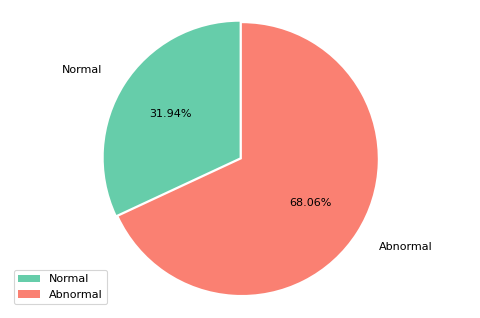

In [6]:
plt.figure(figsize=(7.5,5),dpi=80) # fig size
labels = ['Normal','Abnormal'] # label
sizes = [num_nor,num_ab] # area of each sector
colors = ['mediumaquamarine','salmon'] # color of each sector
explode = (0.01,0.01)
patches,text1,text2 = plt.pie(sizes,            
                      explode=explode,
                      labels=labels,
                      colors=colors,
                      labeldistance = 1.2,
                      autopct = '%3.2f%%', 
                      shadow = False, 
                      startangle =90, 
                      pctdistance = 0.6) 
# patches: pie chart，texts1: label text，texts2: pie chart text
plt.axis('equal')
plt.legend()
# plt.savefig('class_dis_patients.png')
plt.show()

### Draw the feature distribution histograms for each class

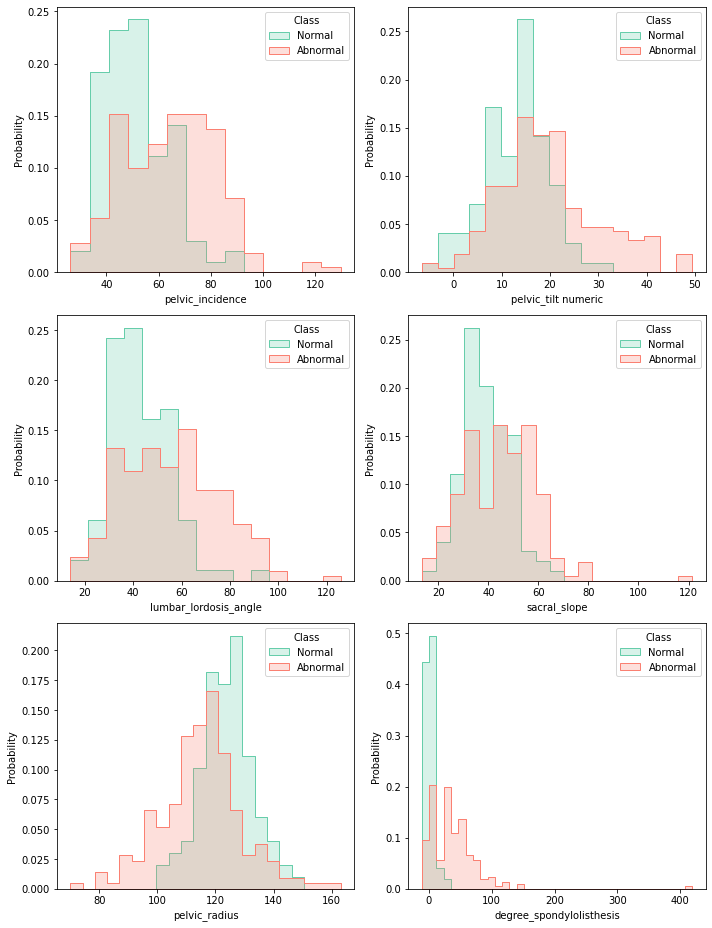

In [7]:
plt.figure(figsize=(10, 13))
# sns.color_palette('pastel')
pal = {0: 'salmon', 1: 'mediumaquamarine'}
label= {0: 'Abnormal', 1: 'Normal'}

plt.subplot(321)  
sns.histplot(df_data, x="pelvic_incidence", hue="Class", palette=pal, element="step", stat="probability", common_norm=False)
plt.legend(['Normal','Abnormal'],title='Class')

plt.subplot(322)  
sns.histplot(df_data, x="pelvic_tilt numeric", hue="Class", palette=pal, element="step", stat="probability", common_norm=False)
plt.legend(['Normal','Abnormal'],title='Class')

plt.subplot(323)  
sns.histplot(df_data, x="lumbar_lordosis_angle", hue="Class", palette=pal, element="step", stat="probability", common_norm=False)
plt.legend(['Normal','Abnormal'],title='Class')

plt.subplot(324)  
sns.histplot(df_data, x="sacral_slope", hue="Class", palette=pal, element="step", stat="probability", common_norm=False)
plt.legend(['Normal','Abnormal'],title='Class')

plt.subplot(325)  
sns.histplot(df_data, x="pelvic_radius", hue="Class", palette=pal, element="step", stat="probability", common_norm=False)
plt.legend(['Normal','Abnormal'],title='Class')

plt.subplot(326)  
sns.histplot(df_data, x="degree_spondylolisthesis", hue="Class", palette=pal, element="step", stat="probability", common_norm=False)
plt.legend(['Normal','Abnormal'],title='Class') 


plt.tight_layout()
# plt.savefig('feature_dis_patients.png')
plt.show()

# Data Visualization for Credit Card Data

In [8]:
# read credit card data
df_data_c = pd.read_csv('./creditcard.csv')

In [9]:
# calculate the number of patients in each class
num_all_c = np.shape(df_data_c)[0]
num_fr = np.sum(df_data_c.iloc[:,29])  # total number of fraud class (fraud:1)
num_nor_c = num_all_c - num_fr    # normal:0 
print(num_all_c,num_fr,num_nor_c)

991 492 499


### Draw the pie chart of two classes

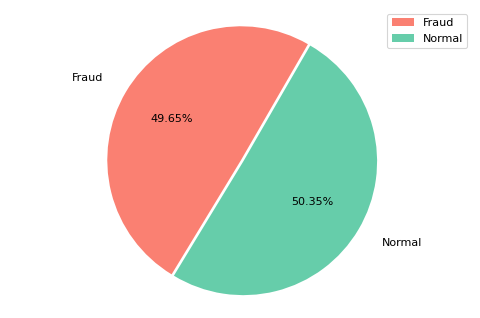

In [11]:
plt.figure(figsize=(7.5,5),dpi=80) 
labels_c = ['Fraud','Normal'] 
sizes_c = [num_fr,num_nor_c] 
colors_c = ['salmon','mediumaquamarine'] 
explode_c = (0.01,0.01)
patches,text1,text2 = plt.pie(sizes_c,            
                      explode=explode_c,
                      labels=labels_c,
                      colors=colors_c,
                      labeldistance = 1.2,
                      autopct = '%3.2f%%', 
                      shadow = False, 
                      startangle = 60, 
                      pctdistance = 0.6) 

plt.axis('equal')
plt.legend()
# plt.savefig('class_credit_card.png')
plt.show()

### Draw the amount distribution histograms for each class

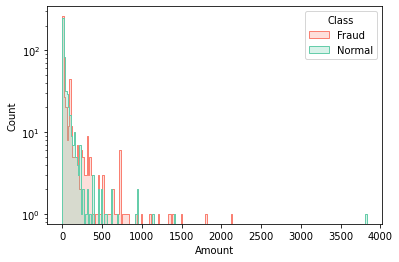

In [12]:
# plt.figure(figsize=(10, 13))
# sns.color_palette('pastel')
pal_c = {0: 'mediumaquamarine', 1: 'salmon'}
label_c= {0: 'Abnormal', 1: 'Normal'}
 
sns.histplot(df_data_c, x="Amount", hue=df_data_c.iloc[:,29], palette=pal_c, element="step", stat="count", common_norm=False)
plt.yscale('log')
# plt.savefig('amount_dis_creditcard.png')
plt.legend(['Fraud','Normal'],title='Class')

Most Amount is less than 500, thus selecting the amount less than 500 and plot the distribution

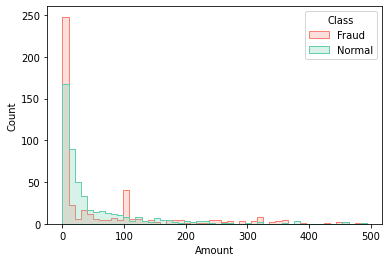

In [ ]:
# Select amount<500
 
sns.histplot(df_data_c[df_data_c['Amount']<500], x="Amount", hue=df_data_c.iloc[:,29], palette=pal_c, element="step", stat="count", common_norm=False,bins=50)
# plt.yscale('log')
# plt.savefig('amount_dis_creditcard_r500.png')
plt.legend(['Fraud','Normal'],title='Class')

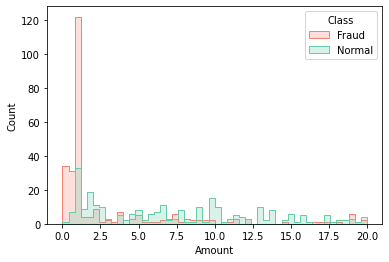

In [ ]:
# Select amount<20
 
sns.histplot(df_data_c[df_data_c['Amount']<20], x="Amount", hue=df_data_c.iloc[:,29], palette=pal_c, element="step", stat="count", common_norm=False,bins=50)
# plt.yscale('log')
# plt.savefig('amount_dis_creditcard_r20.png')
plt.legend(['Fraud','Normal'],title='Class')

# Quantitative analysis

## Orthopedic Patients

### Calculate the mean, variance, skewness

In [13]:
sta = scipy.stats.describe(df_data.iloc[:,:-1], ddof=1, bias=False)
print('mean:',sta.mean)
print('variance:',sta.variance)
print('skewness:',sta.skewness)

mean: [ 60.49663871  17.54280884  51.9309      42.95382581 117.92069677
  26.29664094]
variance: [ 297.09344953  100.16662358  344.2503899   180.18018221  177.35205262
 1410.66304122]
skewness: [ 0.52037114  0.67656569  0.59942712  0.79258047 -0.17685411  4.31792445]


In [14]:
# solution 2
ncol=np.shape(df_data)[1]
mean_list=[]
variance_list=[]
skewness_list=[] # adjusted Fisher-Pearson standardized moment coefficient.
for i in range(ncol-1):
  m = np.average(df_data.iloc[:,i])
  v = statistics.variance(df_data.iloc[:,i])
  s = scipy.stats.skew(df_data.iloc[:,i], bias=False)
  mean_list.append(m)
  variance_list.append(v)
  skewness_list.append(s)
print('mean:',mean_list)
print('variance:',variance_list)
print('skewness:',skewness_list)

mean: [60.49663870967741, 17.54280883870968, 51.930899999999994, 42.95382580645162, 117.92069677419356, 26.296640935483868]
variance: [297.0934495260048, 100.1666235841009, 344.250389902589, 180.1801822090406, 177.35205261973067, 1410.6630412157062]
skewness: [0.5203711396869902, 0.6765656912875143, 0.5994271173199884, 0.7925804725555348, -0.17685410827106351, 4.3179244548948725]


### plot correlation heatmap

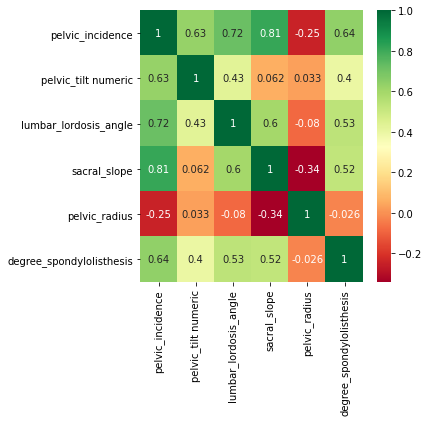

In [15]:
#get correlations of each features in dataset
corrmat = df_data.iloc[:,:-1].corr()
top_corr_features = corrmat.index
plt.figure(figsize=(5,5))
# plot heatmap
g=sns.heatmap(df_data[top_corr_features].corr(),annot=True,cmap="RdYlGn")
# plt.savefig('heatmap_patients.png', bbox_inches='tight')

## Credit Card

### Calculate the mean, variance, skewness

In [16]:
sta_c = scipy.stats.describe(df_data_c.iloc[:,:-1], ddof=1, bias=False)
print('mean:',sta_c.mean)
print('variance:',sta_c.variance)
print('skewness:',sta_c.skewness)

mean: [-2.45229598e+00  1.89378640e+00 -3.05480658e+00  2.44107482e+00
 -1.54859254e+00 -5.65182690e-01 -2.71081492e+00  2.59816136e-01
 -1.28915204e+00 -2.78575809e+00  1.93430514e+00 -2.97486460e+00
 -9.20154313e-02 -3.57366106e+00  6.60167353e-02 -2.14345501e+00
 -3.34306870e+00 -1.21068904e+00  3.37847055e-01  2.10319111e-01
  3.51996080e-01 -4.46013847e-02 -3.68408821e-02 -4.72367874e-02
  8.69480999e-02  2.76510983e-02  9.43709630e-02  2.78611707e-02
  9.58483653e+01]
variance: [2.90689934e+01 1.28614451e+01 4.12514638e+01 9.24525733e+00
 1.75709131e+01 3.24866622e+00 3.41923111e+01 2.33572643e+01
 5.12410916e+00 2.06102409e+01 7.48882638e+00 2.16005440e+01
 1.02144223e+00 2.08008047e+01 1.00253280e+00 1.16734929e+01
 3.52720315e+01 5.53409700e+00 1.64168992e+00 1.11889192e+00
 7.71541296e+00 1.30460953e+00 1.31104878e+00 3.44280694e-01
 4.08549989e-01 2.19367053e-01 1.00149762e+00 1.94907074e-01
 5.72908083e+04]
skewness: [-2.75724969  1.92512242 -2.13047583  0.94619383 -2.30176

In [17]:
# Solution 2
ncol_c=np.shape(df_data_c)[1]
mean_list_c=[]
variance_list_c=[]
skewness_list_c=[] # adjusted Fisher-Pearson standardized moment coefficient.
for i in range(ncol_c-1):
  m = np.average(df_data_c.iloc[:,i])
  v = statistics.variance(df_data_c.iloc[:,i])
  s = scipy.stats.skew(df_data_c.iloc[:,i], bias=False)
  mean_list_c.append(m)
  variance_list_c.append(v)
  skewness_list_c.append(s)
print('mean:',mean_list_c)
print('variance:',variance_list_c)
print('skewness:',skewness_list_c)

mean: [-2.4522959757820386, 1.8937863954288598, -3.054806582038345, 2.4410748236125133, -1.5485925416750754, -0.5651826904137236, -2.710814916649849, 0.25981613551967714, -1.2891520422805247, -2.785758092663976, 1.9343051420787083, -2.9748645951059536, -0.09201543128153379, -3.573661057013118, 0.06601673529767911, -2.143455005751766, -3.3430687014328964, -1.2106890418163474, 0.3378470551967709, 0.21031911099899092, 0.3519960795761856, -0.04460138467204844, -0.03684088213925329, -0.047236787376387486, 0.08694809990918265, 0.02765109830474268, 0.09437096300706356, 0.027861170716448037, 95.8483652875883]
variance: [29.068993374596563, 12.861445091203413, 41.251463839653866, 9.245257332160088, 17.570913067361047, 3.2486662245934985, 34.19231112067999, 23.357264313938696, 5.1241091569359805, 20.61024092555949, 7.488826375705718, 21.60054404436873, 1.0214422271677281, 20.800804681660065, 1.0025327985511112, 11.673492900357603, 35.27203148188687, 5.534096999437539, 1.6416899193016863, 1.11889

### plot correlation heatmap

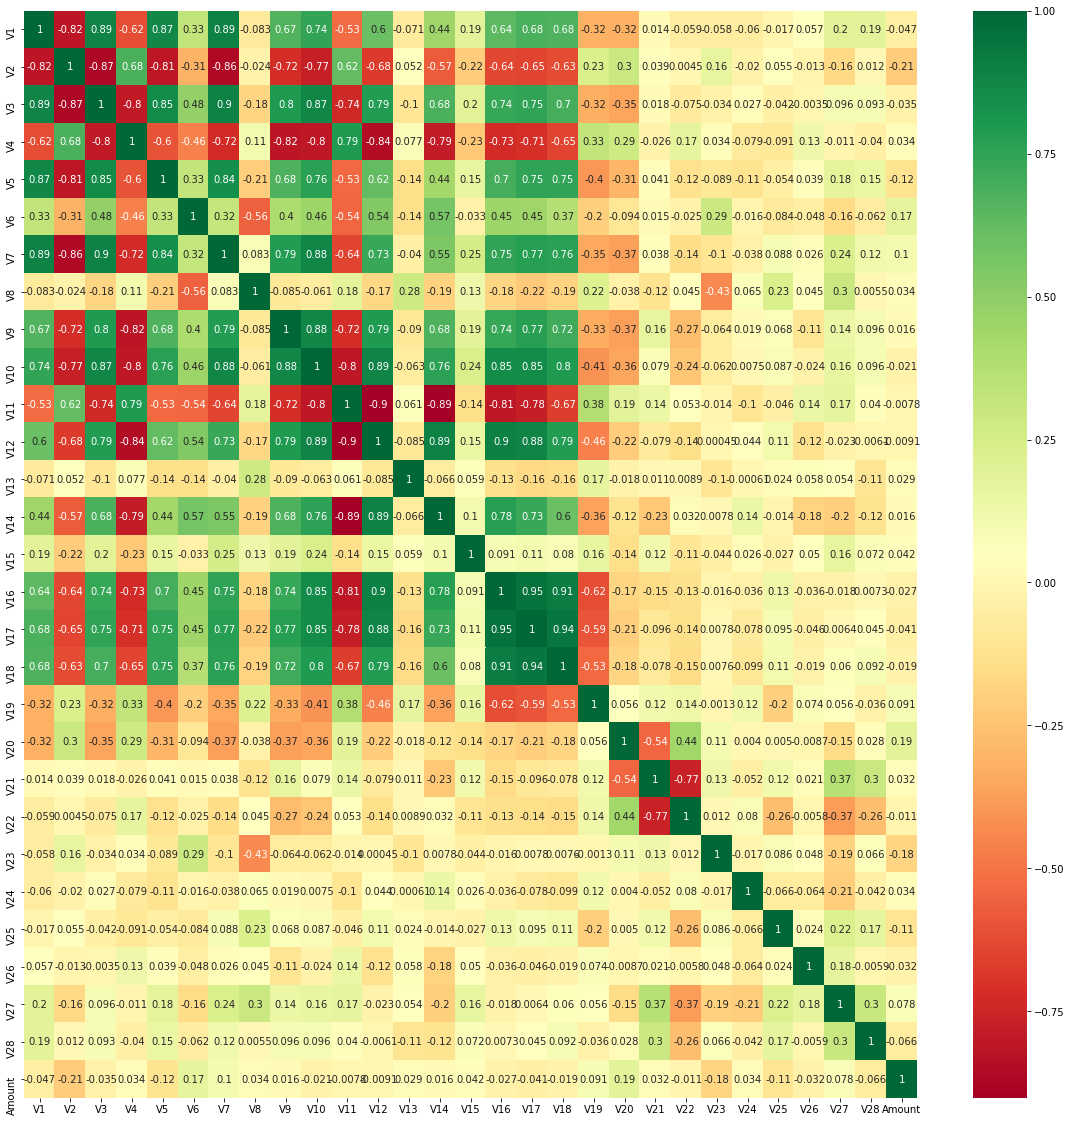

In [18]:
#get correlations of each features in dataset
corrmat_c = df_data_c.iloc[1:,:-1].corr()
top_corr_features_c = corrmat_c.index
plt.figure(figsize=(20,20))
#plot heatmap
g_c=sns.heatmap(df_data_c[top_corr_features_c].corr(),annot=True,cmap="RdYlGn")
# plt.savefig('heatmap_creditcard.png')